In [9]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.base import clone
from rfpimp import *
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rf_model = pickle.load(open('random_forest_completion_first_half.p', 'rb')) # load the model

In [3]:
# model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=20, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

In [4]:
def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def print_roc_curve(y_test, probabilities):
    '''
    Calculates and prints a ROC curve given a set of test classes and probabilities from a trained classifier
    '''
    tprs, fprs, thresh = roc_curve(y_test, probabilities)
    plt.figure(figsize=(12,10))
    plt.plot(fprs, tprs, 
         label='Logistic Regression', 
         color='red')
    plt.plot([0,1],[0,1], 'k:')
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve AUC: {} Recall: {}".format(roc_auc, recall))
    plt.show()

In [5]:
# X_train = pd.read_csv('../data/processed/first_half/X_train.csv')
# y_train = pd.read_csv('../data/processed/first_half/y_train.csv')
# y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/first_half/X_test.csv')

y_test = pd.read_csv('../data/processed/first_half/y_test.csv')
y_test = y_test['module_not_completed']

# fill
# X_train.fillna(value = 0, inplace = True)
# X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)

In [6]:
    predictions = rf_model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)
    probas = rf_model.predict_proba(X_test)[:, :1]
    tprs, fprs, thresh = roc_curve(y_test, probas)
    recall = recall_score(y_test, predictions)
    conf_mat = standard_confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

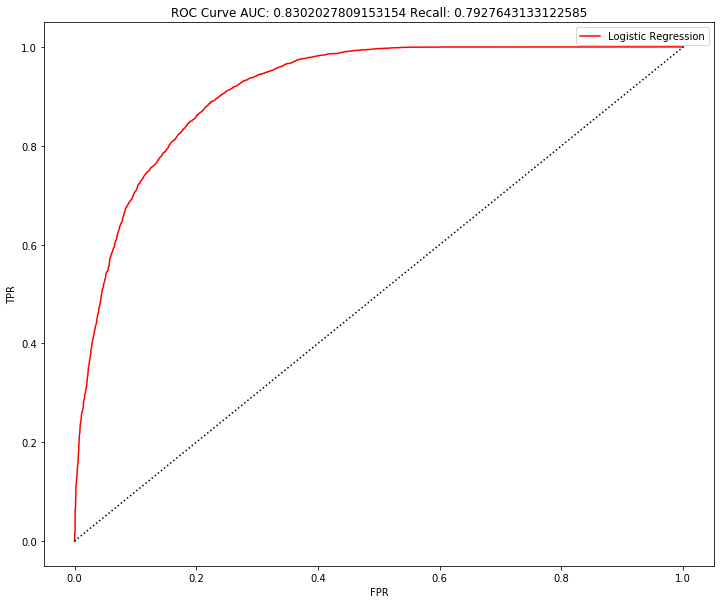

Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Roc Auc: 0.8302027809153154

Recall Score: 0.7927643133122585

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.87      0.83      5062
        True       0.87      0.79      0.83      5694

   micro avg       0.83      0.83      0.83     10756
   macro avg       0.83      0.83      0.83     10756
weighted avg       0.83      0.83      0.83     10756


Confusion Matrix:
 [[4514  670]
 [1180 4392]]


In [7]:
    print_roc_curve(y_test, probas)
    print('Best Model: {}'.format(rf_model))
    print('\nRoc Auc: {}'.format(roc_auc))
    print('\nRecall Score: {}'.format(recall))
    print('\nClassification Report:\n {}'.format(class_report))
    print('\nConfusion Matrix:\n {}'.format(standard_confusion_matrix(y_test, predictions)))

In [12]:
feat_imp = importances(rf_model, X_test, y_test)

In [22]:
feat_imp.sort_values(by='Importance', ascending=False)[0:10]

,Importance
Feature,
avg_score,0.0646
sum_click_quiz,0.0104
sum_days_vle_accessed,0.0078
days_early_first_assessment,0.0062
code_module_GGG,0.0044
sum_click_page,0.0044
sum_click_ouwiki,0.0030
code_module_BBB,0.0022
code_module_FFF,0.0020


In [29]:
pd.DataFrame(data={'fprs': fprs, 'tprs': tprs, 'Thresholds': thresh}).loc[300:1000:25]

,fprs,tprs,Thresholds
300,0.092202,0.689648,0.670
325,0.108360,0.727776,0.644
350,0.127678,0.757211,0.618
375,0.148753,0.787831,0.590
400,0.166315,0.815093,0.564
425,0.181946,0.837416,0.539
450,0.199508,0.858356,0.513
475,0.215139,0.878507,0.488
500,0.234633,0.897076,0.463
525,0.253600,0.912683,0.437


In [ ]:
pickle.dump(model, open('random_forest_completion_first_half.p', 'wb')) # save the model